In [1]:
from itertools import product
import math
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from scipy import stats

%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Useful directory path.
root_dir = f'{os.getcwd()}/../results'
graphics_dir = f'{root_dir}/graphics'

# GP tools.
tools = ('DEAP', 'TensorGP (CPU)', 'TensorGP (GPU)', 'Operon', 'FPGA')

# Function sets.
function_sets = {
    'nicolau_a': (4, 7, 255, 8),
    'nicolau_b': (6, 5, 63, 2),
    'nicolau_c': (9, 4, 31, 1)
}

# Numbers of fitness cases.
num_fitness_cases = (10, 100, 1000, 10000, 100000)

# Number of programs per size bin.
nppsb = 128

# Program dictionary.
with open(f'{root_dir}/programs/programs.pkl', 'rb') as f:
    program_dict = pickle.load(f) 

Function counts, bin 0: [71, 66, 61, 65]
Function counts, bin 1: [199, 191, 185, 190]
Function counts, bin 2: [328, 290, 317, 329]
Function counts, bin 3: [427, 445, 447, 447]
Function counts, bin 4: [596, 597, 542, 577]
Function counts, bin 5: [700, 684, 711, 715]
Function counts, bin 6: [829, 818, 825, 822]
Function counts, bin 7: [960, 962, 994, 927]
Function counts, bin 8: [1053, 1120, 1115, 1029]
Function counts, bin 9: [1195, 1237, 1187, 1235]
Function counts, bin 10: [1316, 1342, 1338, 1358]
Function counts, bin 11: [1493, 1422, 1496, 1457]
Function counts, bin 12: [1640, 1631, 1572, 1536]
Function counts, bin 13: [1770, 1655, 1679, 1783]
Function counts, bin 14: [1870, 1851, 1890, 1796]
Function counts, bin 15: [1971, 2009, 1948, 1974]
Function counts, bin 16: [2055, 2133, 2082, 2164]
Function counts, bin 17: [2173, 2278, 2220, 2285]
Function counts, bin 18: [2372, 2363, 2284, 2451]
Function counts, bin 19: [2525, 2511, 2528, 2417]
Function counts, bin 20: [2615, 2563, 2656, 26

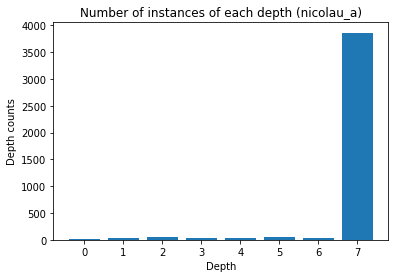

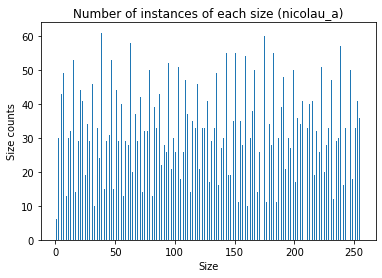

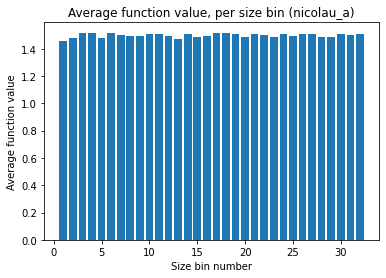

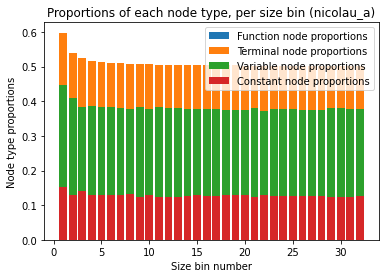

Function counts, bin 0: [33, 37, 0, 0, 0, 0]
Function counts, bin 1: [50, 55, 26, 21, 38, 27]
Function counts, bin 2: [76, 75, 58, 46, 58, 64]
Function counts, bin 3: [109, 84, 80, 84, 92, 76]
Function counts, bin 4: [144, 126, 103, 101, 116, 102]
Function counts, bin 5: [128, 145, 138, 141, 131, 140]
Function counts, bin 6: [160, 176, 158, 153, 177, 158]
Function counts, bin 7: [176, 170, 203, 194, 181, 188]
Function counts, bin 8: [213, 185, 218, 212, 216, 225]
Function counts, bin 9: [226, 223, 234, 223, 249, 263]
Function counts, bin 10: [252, 255, 262, 256, 271, 282]
Function counts, bin 11: [245, 257, 296, 315, 295, 292]
Function counts, bin 12: [262, 250, 339, 346, 296, 339]
Function counts, bin 13: [246, 286, 359, 347, 370, 363]
Function counts, bin 14: [236, 294, 409, 395, 362, 404]
Function counts, bin 15: [271, 239, 426, 454, 433, 392]
Function counts, bin 16: [358, 351, 427, 438, 443, 429]
Function counts, bin 17: [388, 368, 462, 481, 457, 441]
Function counts, bin 18: [326

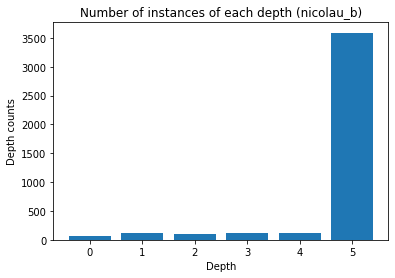

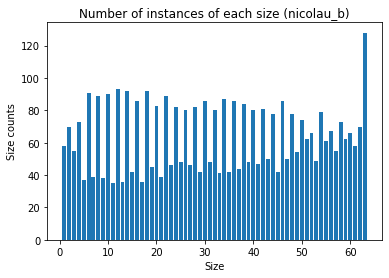

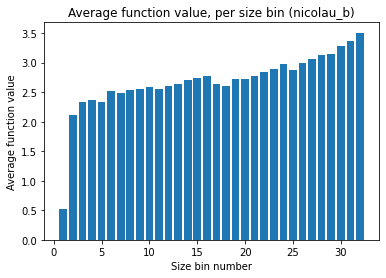

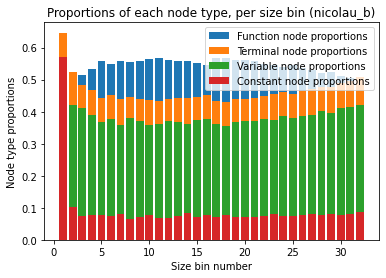

Function counts, bin 0: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Function counts, bin 1: [28, 27, 22, 27, 24, 0, 0, 0, 0]
Function counts, bin 2: [28, 35, 24, 27, 30, 17, 12, 11, 16]
Function counts, bin 3: [49, 27, 45, 41, 46, 19, 22, 23, 24]
Function counts, bin 4: [46, 50, 50, 61, 51, 31, 32, 32, 32]
Function counts, bin 5: [57, 61, 55, 51, 48, 50, 42, 36, 56]
Function counts, bin 6: [54, 58, 65, 70, 67, 52, 72, 53, 50]
Function counts, bin 7: [83, 67, 72, 51, 69, 60, 67, 84, 66]
Function counts, bin 8: [74, 66, 64, 76, 48, 92, 98, 92, 66]
Function counts, bin 9: [72, 82, 90, 73, 91, 94, 98, 89, 91]
Function counts, bin 10: [85, 78, 100, 89, 76, 99, 108, 115, 104]
Function counts, bin 11: [87, 80, 84, 75, 92, 116, 138, 122, 119]
Function counts, bin 12: [74, 75, 70, 79, 80, 144, 131, 152, 152]
Function counts, bin 13: [86, 85, 90, 88, 69, 167, 151, 135, 170]
Function counts, bin 14: [87, 70, 65, 82, 78, 179, 187, 158, 181]
Function counts, bin 15: [74, 56, 58, 63, 55, 206, 187, 206, 208]
Functio

/home/UFAD/ccrary/.miniconda/envs/gp-eval-profile/lib/python3.9/site-packages/scipy/stats/stats.py:6707: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs_float - f_exp)**2 / f_exp


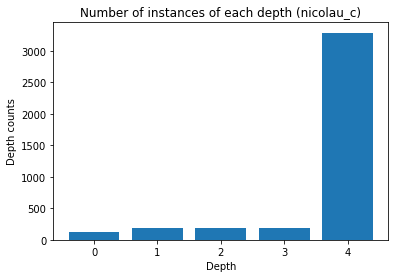

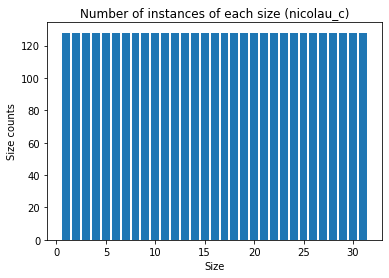

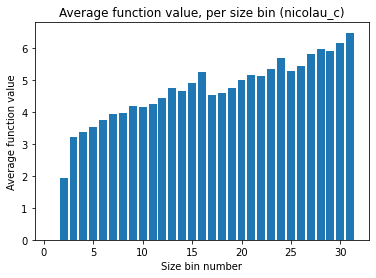

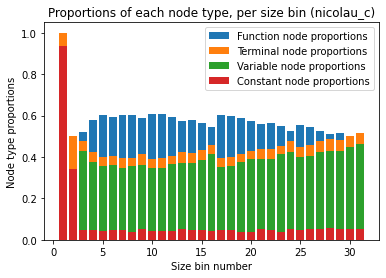

In [2]:
# Compute some statistics for the set of random programs
# generated for each function set.

# Total number of nodes for each size bin, for each function set.
num_nodes = []

for name, (num_functions, max_depth, max_size, bin_size) in (
    function_sets.items()):
    # For each function set...

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # List where the `i`-th element, `0 <= i <= max_depth`, 
    # is to represent the number of instances for depth `i` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    depth_counts = [0]*(max_depth+1)

    # List where the `i`-th element, `0 <= i <= max_size-1`, 
    # is to represent the number of instances for size `i+1` 
    # over all random programs (i.e., from all size bins) 
    # for the function set with name `name`.
    size_counts = [0]*(max_size)

    # Lists where the `i`-th element contains the proportion
    # of the total number of nodes for size bin `i` that are 
    # functions/variables/constants/terminals.
    function_node_proportions = []
    variable_node_proportions = []
    constant_node_proportions = []
    terminal_node_proportions = []
    
    # List where the `i`-th element is to represent the 
    # "average function value" for size bin `i`, where 
    # this value is defined here to be the sum of the 
    # numbers of instances of each function type, with 
    # the `i`-th function type (specified by the `function_
    # counts` list) multiplied by `i`, all divided by the 
    # number of function types.
    #
    # In general, if the numbers of instances of function 
    # types are uniformly distributed for each size bin, 
    # the "average function value" as defined above should 
    # be equal to the number of function types minus one,
    # divided by 2. Thus, we can check for such uniformity
    # for each size bin by inspecting such an average value.
    average_function_values = []

    # Prepare for sizes related to the function set.
    num_nodes.append([])

    # Results of chi-square tests for each bin of the function set.
    chi_square = [[]]

    # Compute the relevant list elements.
    for i, (programs, depths, sizes, function_counts, 
        variable_counts, constant_counts) in enumerate(program_dict[name]
            [0:num_size_bins]):

        for depth in depths: depth_counts[depth] += 1
        for size in sizes: size_counts[size-1] += 1

        function_node_sum = sum(function_counts)
        variable_node_sum = sum(variable_counts)
        constant_node_sum = sum(constant_counts)
        terminal_node_sum = variable_node_sum + constant_node_sum
        node_sum = function_node_sum + terminal_node_sum

        function_node_proportions.append(function_node_sum/node_sum)
        variable_node_proportions.append(variable_node_sum/node_sum)
        constant_node_proportions.append(constant_node_sum/node_sum)
        terminal_node_proportions.append(terminal_node_sum/node_sum)
 
        average_function_value = (0) if (function_node_sum == 0) else (
            sum([i*function_counts[i] for i in range(
                num_functions)])/function_node_sum)

        average_function_values.append(average_function_value)

        # Add total number of nodes for the current size bin.
        num_nodes[-1].append(sum(sizes))

        # P-value for one-way chi-square test, performed for 
        # each set of function counts.
        _, p = stats.chisquare(function_counts)
        chi_square[-1].append(p)

        print(f'Function counts, bin {i}: {function_counts}')

    print(f'Chi-square p-values: {chi_square[-1]}')
    print(f'Minimum chi-square p-value: {min(chi_square[-1])}')
    print(f'Average chi-square p-value: {np.mean(chi_square[-1])}')

    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program depth.

    # print('Program depths: ', depth_counts)
    # print('Mean of depth counts: ', np.mean(depth_counts))
    # print('Variance of depth counts: ', np.var(depth_counts))
    # print('Standard deviation of depth counts: ', np.std(depth_counts))
    # print(stats.chisquare(depth_counts))

    # Plot bar graph of depth counts.
    index = range(0, max_depth+1)
    plt.bar(index, depth_counts)
    plt.xlabel('Depth')
    plt.ylabel('Depth counts')
    plt.title('Number of instances of each depth ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/depths.svg')
    plt.show()


    # Compute/plot some relevant statistics for the number 
    # of instances of each possible program size.

    # print('Program sizes: ', size_counts)
    # print('Mean of size counts: ', np.mean(size_counts))
    # print('Variance of size counts: ', np.var(size_counts))
    # print('Standard deviation of size counts: ', np.std(size_counts))
    # print(stats.chisquare(size_counts))

    # Plot bar graph of size counts.
    index = range(1, max_size+1)
    plt.bar(index, size_counts)
    plt.xlabel('Size')
    plt.ylabel('Size counts')
    plt.title('Number of instances of each size ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/sizes.svg')
    plt.show()


    # Compute/plot some relevant statistics for the average
    # function values.

    # print('Average function values: ', average_function_values)
    # print('Mean of average function values: ', 
    #     np.mean(average_function_values))
    # print('Variance of average function values: ', 
    #     np.var(average_function_values))
    # print('Standard deviation of average function values: ', 
    #     np.std(average_function_values))
    # print(f'\n\nAverage function values: {average_function_values}\n\n')
    # print(stats.chisquare(average_function_values))

    # Plot bar graph of average function values.
    index = range(1, num_size_bins+1)

    #log_approx = [4*(1/log(max_size,2))*log(max_size/x,2) + 
    #    10.5*(1/log(max_size,2))*log(x, 2) for x in index]

    #plt.plot(index, log_approx)
    plt.bar(index, average_function_values)

    plt.xlabel('Size bin number')
    plt.ylabel('Average function value')
    plt.title('Average function value, per size bin ('+name+')')
    plt.savefig(f'{graphics_dir}/{name}/average_function_values.svg')
    plt.show()


    # Compute/plot some relevant statistics for proportions
    # of the total number of nodes with particular node types.

    # print('Function node proportions: ', function_node_proportions)
    # print('Terminal node proportions: ', terminal_node_proportions)
    # print('Variable node proportions: ', variable_node_proportions)
    # print('Constant node proportions: ', constant_node_proportions)


    # Plot bar graph of function counts.
    index = range(1, num_size_bins+1)
    plt.bar(index, function_node_proportions, 
        label='Function node proportions')
    plt.bar(index, terminal_node_proportions, 
        label='Terminal node proportions')
    plt.bar(index, variable_node_proportions, 
        label='Variable node proportions')
    plt.bar(index, constant_node_proportions, 
        label='Constant node proportions')
    plt.xlabel('Size bin number')
    plt.ylabel('Node type proportions')
    plt.title('Proportions of each node type, per size bin ('+name+')')
    plt.legend(loc='upper right')
    plt.savefig(f'{graphics_dir}/{name}/node_proportions.svg')
    plt.show()

In [3]:
# Average of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
avg_med_avg_runtimes = []

# Median of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
med_med_avg_runtimes = []

# Minimum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
min_med_avg_runtimes = []

# Maximum of *median average runtimes* for each size bin,
# for each number of fitness cases, for each function set,
# for each tool.
max_med_avg_runtimes = []

# Standard deviation of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
std_dev_med_avg_runtimes = []

# Interquartile range of *median average runtimes* for each size 
# bin, for each number of fitness cases, for each function set,
# for each tool.
iqr_med_avg_runtimes = []

# Median node evaluations per second (NEPS) from *median average
# runtimes* for each size bin, for each number of fitness cases, 
# for each function set, for each tool.
med_neps = []

# Median of median node evaluations per second (NEPS) for each 
# size bin, for each number of fitness cases, for each function 
# set, for each tool.
med_med_neps = []

# Interquartile range of median node evaluations per second (NEPS) 
# for each size bin, for each number of fitness cases, for each 
# function set, for each tool.
iqr_med_neps = []

In [4]:
####################################################################

# Compute statistics for DEAP.

with open(f'{root_dir}/results_deap.pkl', 'rb') as f:
    _, med_avg_runtimes = pickle.load(f)

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each 
        # size bin, relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each 
        # size bin, relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Number of nodes per size bin:', num_nodes[i])

        # Number of node evaluations per size bin.
        num_evals = [(n * nfc) for n in num_nodes[i]]

        print('Number of node evaluations per size bin:', num_evals)

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_evals_ / med_avg_runtime
            for med_avg_runtime in med_avg_runtimes[i][j][k]]
            for k, num_evals_ in enumerate(num_evals)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

        # Minimum median NEPS value.
        print('Minimum median NEPS value', min(med_med_neps[-1][-1][-1]))

        # Maximum median NEPS value.
        print('Maximum median NEPS value', max(med_med_neps[-1][-1][-1]))

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.05363086216666583, 0.05751535349999889, 0.06119462499999647, 0.06334008616666391, 0.06692420816666811, 0.0696324601666684, 0.07429609099999605, 0.0781121599999987, 0.0789975029999989, 0.08392097850000131, 0.0863740493333296, 0.09017318166666399, 0.09139194450000095, 0.09439946899999778, 0.09867546166666585, 0.10145962466666703, 0.10439582133333165, 0.10788278566666776, 0.1118240798333332, 0.1156906194999981, 0.11419724316666684, 0.12131167399999991, 0.12158140533333277, 0.12687250533333128, 0.129161803, 0.1304481063333327, 0.13546055883333472, 0.13686824266666756, 0.13925819316666832, 0.1423932456666653, 0.14515423633333313, 0.15213287850000037]


Medians of median average runtimes: [0.053444509499996684, 0.057727311000000725, 0.06119585049999898, 0.06335171299999587, 0.06721261199999873, 0.06991597800000449, 0.07374284699999833, 0.07736261400000188, 0.0781560980000009, 0.0843577

In [5]:
####################################################################

# Compute statistics for TensorGP.

with open(f'{root_dir}/results_tensorgp.pkl', 'rb') as f:
    med_avg_runtimes = pickle.load(f)

for i, device in enumerate(('CPU', 'GPU')):
    # For each device...
    print(f'For device `{device}`...')

    # Prepare for statistics related to the tool.
    avg_med_avg_runtimes.append([])
    med_med_avg_runtimes.append([])
    min_med_avg_runtimes.append([])
    max_med_avg_runtimes.append([])
    std_dev_med_avg_runtimes.append([])
    iqr_med_avg_runtimes.append([])
    med_neps.append([])
    med_med_neps.append([])
    iqr_med_neps.append([])

    for j, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
        function_sets.items()):
        # For each function set...
        print(f'For function set `{name}`...')

        # Number of "size bins."
        num_size_bins = int(math.ceil(max_size/bin_size))

        # Prepare for statistics related to the function set.
        avg_med_avg_runtimes[-1].append([])
        med_med_avg_runtimes[-1].append([])
        min_med_avg_runtimes[-1].append([])
        max_med_avg_runtimes[-1].append([])
        std_dev_med_avg_runtimes[-1].append([])
        iqr_med_avg_runtimes[-1].append([])
        med_neps[-1].append([])
        med_med_neps[-1].append([])
        iqr_med_neps[-1].append([])

        for k, nfc in enumerate(num_fitness_cases):
            # For each number of fitness cases...
            print(f'For number of fitness cases `{nfc}`...')


            # Average of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            avg_med_avg_runtimes[-1][-1].append(
                [np.mean(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Averages of median average runtimes:', 
                avg_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Median of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            med_med_avg_runtimes[-1][-1].append(
                [np.median(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Medians of median average runtimes:', 
                med_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Minimum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            min_med_avg_runtimes[-1][-1].append(
                [min(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Minimums of median average runtimes:', 
                min_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Maximum of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            max_med_avg_runtimes[-1][-1].append(
                [max(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Maximums of median average runtimes:', 
                max_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Standard deviation of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            std_dev_med_avg_runtimes[-1][-1].append(
                [np.std(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Standard deviations of median average runtimes:', 
                std_dev_med_avg_runtimes[-1][-1][-1])
            print('\n')

            # Interquartile range of *median average runtimes* for each size bin,
            # relevant to the number of fitness cases.
            iqr_med_avg_runtimes[-1][-1].append(
                [stats.iqr(med_avg_runtimes[i][j][k][m]) 
                for m in range(num_size_bins)])
            print('Interquartile range of median average runtimes:', 
                iqr_med_avg_runtimes[-1][-1][-1])
            print('\n\n')

            print('Number of nodes per size bin:', num_nodes[j])

            # Number of node evaluations per size bin.
            num_evals = [(n * nfc) for n in num_nodes[j]]

            print('Number of node evaluations per size bin:', num_evals)

            # Median node evaluations per second (NEPS) from *median 
            # average runtimes*, for each size bin, relevant to the 
            # number of fitness cases.
            med_neps[-1][-1].append([[num_evals_ / med_avg_runtime
                for med_avg_runtime in med_avg_runtimes[i][j][k][m]]
                for m, num_evals_ in enumerate(num_evals)])
            print('Median node evaluations per second:', 
                med_neps[-1][-1][-1])
            print('\n')

            # Median node evaluations per second (NEPS) of *median 
            # average runtimes*, for each size bin, relevant to the 
            # number of fitness cases.
            med_med_neps[-1][-1].append([np.median(med_neps_) 
                for med_neps_ in med_neps[-1][-1][-1]])
            print('Median of median node evaluations per second:', 
                med_med_neps[-1][-1][-1])
            print('\n')

            # Interquartile range of median node evaluations per 
            # second (NEPS), for each size bin, relevant to the number 
            # of fitness cases.
            iqr_med_neps[-1][-1].append([stats.iqr(med_neps_) 
                for med_neps_ in med_neps[-1][-1][-1]])
            print('Interquartile range of median node evaluations per second:', 
                iqr_med_neps[-1][-1][-1])
            print('\n')

For device `CPU`...
For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [0.03602483309996387, 0.05122940289998042, 0.06548763049997888, 0.07520699840001725, 0.08951811890005956, 0.10018311589999485, 0.11400296040001194, 0.12412562389999948, 0.1353017834999946, 0.14996908809998785, 0.17033332139999402, 0.17220522019995316, 0.18210533089995806, 0.20034274710003502, 0.21326442360000328, 0.2271419118000267, 0.23454228410000724, 0.24868052140000146, 0.2640307847000031, 0.2710533795999709, 0.28323803859996133, 0.3048413626999945, 0.3036750343999984, 0.3221116338000229, 0.344787714999984, 0.3583071033000351, 0.37109961239998485, 0.37759357859997633, 0.3890362729000117, 0.40323676860000435, 0.41309850279997135, 0.4299391049000178]


Medians of median average runtimes: [0.035904501999993954, 0.051013794500022414, 0.06555190350002249, 0.07547513200006506, 0.08684376850010267, 0.09982414900002823, 0.1139222269999891, 0.12352236100002756, 0.1343

In [6]:
####################################################################

# Compute statistics for Operon.

# Read in the median average runtime results from some 
# CSV files, and convert into another useful format.
med_avg_runtimes = []

for name, (num_functions, max_depth, 
        max_size, bin_size) in function_sets.items():
    
    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics relevant to the function set.
    med_avg_runtimes.append([])

    with open(f'{root_dir}/results_operon_{name}.csv', 'r') as f:
        lines = f.readlines()

    for nfc in num_fitness_cases:
        # Prepare for statistics relevant to the number
        # of fitness cases.
        med_avg_runtimes[-1].append([[] for _ in range(num_size_bins)])

        # Offset into the lines list.
        i = (int(math.log(nfc, 10)) - 1) * num_size_bins

        for j in range(1, num_size_bins + 1):
            # Number of decimal digits needed to represent `j`.
            d = int(math.ceil(math.log(j + 1, 10)))

            # String representing median average runtimes
            # for bin `j`, in terms of microseconds.
            runtimes_str = ''.join(lines[i+j-1].split())[(5+d):]

            # Median average runtimes for bin `j`, in terms
            # of seconds.
            runtimes = [float(t)/(10**6) for t in runtimes_str.split(',')]

            med_avg_runtimes[-1][-1][j-1] = runtimes

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(med_avg_runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Number of nodes per size bin:', num_nodes[i])

        # Number of node evaluations per size bin.
        num_evals = [(n * nfc) for n in num_nodes[i]]

        print('Number of node evaluations per size bin:', num_evals)

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_evals_ / med_avg_runtime
            for med_avg_runtime in med_avg_runtimes[i][j][k]]
            for k, num_evals_ in enumerate(num_evals)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

        # Minimum median NEPS value.
        print('Minimum median NEPS value', min(med_med_neps[-1][-1][-1]))

        # Maximum median NEPS value.
        print('Maximum median NEPS value', max(med_med_neps[-1][-1][-1]))

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [2.4232735399999998e-05, 2.60441548e-05, 2.81638846e-05, 3.06064618e-05, 3.29408546e-05, 3.46843372e-05, 3.64213806e-05, 3.8337359199999994e-05, 4.16351492e-05, 3.5513907e-05, 4.5480502599999994e-05, 4.705003000000001e-05, 4.90928664e-05, 5.0815961600000006e-05, 5.2654572000000006e-05, 5.4534131e-05, 5.68072948e-05, 5.86984116e-05, 6.081658620000001e-05, 6.2624729e-05, 6.540284299999999e-05, 6.6944854e-05, 6.91040496e-05, 7.1339597e-05, 7.388189e-05, 7.58890914e-05, 7.83727028e-05, 8.05486914e-05, 8.32317456e-05, 8.52631296e-05, 8.7793247e-05, 9.039974540000001e-05]


Medians of median average runtimes: [2.4247951e-05, 2.6036722999999997e-05, 2.8183357999999997e-05, 3.0581193e-05, 3.2937114e-05, 3.4679887e-05, 3.6422839000000006e-05, 3.8311422e-05, 4.166041e-05, 4.3431258e-05, 4.5439452e-05, 4.7034968e-05, 4.9031815e-05, 5.0828804e-05, 5.2614176e-05, 5.4445024e-05, 5.688611000000000

In [7]:
####################################################################

# Compute statistics for FPGA.

# Runtimes for FPGA.
runtimes = []

for name, (num_functions, max_depth, 
        max_size, bin_size) in function_sets.items():
    
    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics relevant to the function set.
    runtimes.append([])

    for nfc in num_fitness_cases:
        with open(f'{root_dir}/performance_counts/{name}/{nfc}.txt', 'r') as f:
            # Lines of the current file.
            lines = f.readlines()

            # Clock frequency for specified run.
            clock_freq = float(lines[0])*1e6

            # Runtimes relevant to the number of fitness cases.
            runtimes[-1].append([[float(lines[i])/clock_freq] 
                for i in range(1, num_size_bins+1)])

# Prepare for statistics related to the tool.
avg_med_avg_runtimes.append([])
med_med_avg_runtimes.append([])
min_med_avg_runtimes.append([])
max_med_avg_runtimes.append([])
std_dev_med_avg_runtimes.append([])
iqr_med_avg_runtimes.append([])
med_neps.append([])
med_med_neps.append([])
iqr_med_neps.append([])

for i, (name, (num_functions, max_depth, max_size, bin_size)) in enumerate(
    function_sets.items()):
    # For each function set...
    print(f'For function set `{name}`...')

    # Number of "size bins."
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Prepare for statistics related to the function set.
    avg_med_avg_runtimes[-1].append([])
    med_med_avg_runtimes[-1].append([])
    min_med_avg_runtimes[-1].append([])
    max_med_avg_runtimes[-1].append([])
    std_dev_med_avg_runtimes[-1].append([])
    iqr_med_avg_runtimes[-1].append([])
    med_neps[-1].append([])
    med_med_neps[-1].append([])
    iqr_med_neps[-1].append([])

    for j, nfc in enumerate(num_fitness_cases):
        # For each number of fitness cases...
        print(f'For number of fitness cases `{nfc}`...')

        # Average of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        avg_med_avg_runtimes[-1][-1].append(
            [np.mean(runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Averages of median average runtimes:', 
            avg_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Median of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        med_med_avg_runtimes[-1][-1].append(
            [np.median(runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Medians of median average runtimes:', 
            med_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Minimum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        min_med_avg_runtimes[-1][-1].append(
            [min(runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Minimums of median average runtimes:', 
            min_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Maximum of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        max_med_avg_runtimes[-1][-1].append(
            [max(runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Maximums of median average runtimes:', 
            max_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Standard deviation of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        std_dev_med_avg_runtimes[-1][-1].append(
            [np.std(runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Standard deviations of median average runtimes:', 
            std_dev_med_avg_runtimes[-1][-1][-1])
        print('\n')

        # Interquartile range of *median average runtimes* for each size bin,
        # relevant to the number of fitness cases.
        iqr_med_avg_runtimes[-1][-1].append(
            [stats.iqr(runtimes[i][j][k]) 
            for k in range(num_size_bins)])
        print('Interquartile range of median average runtimes:', 
            iqr_med_avg_runtimes[-1][-1][-1])
        print('\n\n')

        print('Number of nodes per size bin:', num_nodes[i])

        # Number of node evaluations per size bin.
        num_evals = [(n * nfc) for n in num_nodes[i]]

        print('Number of node evaluations per size bin:', num_evals)

        # Median node evaluations per second (NEPS) from *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_neps[-1][-1].append([[num_evals_ / runtime
            for runtime in runtimes[i][j][k]]
            for k, num_evals_ in enumerate(num_evals)])
        print('Median node evaluations per second:', med_neps[-1][-1][-1])
        print('\n')

        # Median node evaluations per second (NEPS) of *median 
        # average runtimes*, for each size bin, relevant to the 
        # number of fitness cases.
        med_med_neps[-1][-1].append([np.median(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Median of median node evaluations per second:', 
            med_med_neps[-1][-1][-1])
        print('\n')

        # Interquartile range of median node evaluations per second 
        # (NEPS), for each size bin, relevant to the number of fitness 
        # cases.
        iqr_med_neps[-1][-1].append([stats.iqr(med_neps_)
            for med_neps_ in med_neps[-1][-1][-1]])
        print('Interquartile range of median node evaluations per second:', 
            iqr_med_neps[-1][-1][-1])
        print('\n')

        # Minimum median NEPS value.
        print('Minimum median NEPS value', min(med_med_neps[-1][-1][-1]))

        # Maximum median NEPS value.
        print('Maximum median NEPS value', max(med_med_neps[-1][-1][-1]))

For function set `nicolau_a`...
For number of fitness cases `10`...
Averages of median average runtimes: [2.9117826861228503e-05, 6.205866978532636e-05, 9.074679495698554e-05, 0.00011976273378872852, 0.00014972224437179385, 0.00017792307896765275, 0.00020547271615766952, 0.00023565815237133313, 0.0002648202783758162, 0.000294939265874598, 0.0003236539705322099, 0.0003531040409678477, 0.00038147321230807397, 0.0004096961964755602, 0.00043983290363164377, 0.0004682065048861955, 0.0004979002206097334, 0.0005306107079889075, 0.0005589621596718319, 0.0005872958916974545, 0.000617547776626, 0.0006454695266193552, 0.000674135502219387, 0.0007038203581142741, 0.0007318882952803693, 0.0007623040870389567, 0.0007905049216348156, 0.0008198708236982696, 0.000848598818098858, 0.0008783412628799759, 0.000906679424819924, 0.0009338835286925551]


Medians of median average runtimes: [2.9117826861228503e-05, 6.205866978532636e-05, 9.074679495698554e-05, 0.00011976273378872852, 0.00014972224437179385, 0

In [8]:
# # Plot graph of median average runtimes for each tool, 
# # for each number of fitness cases, for each function set.
# for i, (name, (_, _, max_size, bin_size)) in enumerate(
#     function_sets.items()):

#     # Number of size bins.
#     num_size_bins = int(math.ceil(max_size/bin_size))

#     # Index range for plot.
#     index = [(bin_size * i) for i in range(1, num_size_bins+1)]

#     for j, nfc in enumerate(num_fitness_cases):
#         for t, tool in enumerate(tools):
#             x = index
#             y = med_med_avg_runtimes[t][i][j]
#             iqr = iqr_med_avg_runtimes[t][i][j]
#             # max_iqr_percentage = [
#             lower_bound = [y_ - iqr_ for y_, iqr_ in zip(y, iqr)]
#             upper_bound = [y_ + iqr_ for y_, iqr_ in zip(y, iqr)]
#             plt.plot(x, y, label=f'{tool}')
#             plt.fill_between(x, lower_bound, upper_bound, color='bisque')
#         plt.xlabel('Maximum program size (bin number)')
#         # plt.xticks(index, [str(size) for size in program_sizes[i]])
#         # plt.locator_params(axis='x', nbins=15)
#         plt.ylabel('Median average runtime')
#         plt.yscale('log')
#         plt.title(
#             f'Median Average Runtime vs. Max. Program Size '
#             f'({nfc} f.c., {name})')
#         plt.legend(loc='upper left')
#         plt.savefig(f'{graphics_dir}/{name}/median_avg_runtime_{nfc}.svg')
#         plt.show()

In [9]:
colors = ('tab:cyan', 'tab:purple', 'tab:blue', 'tab:green', 'tab:red')
markers = ('x', '^', '.', 'd', '*')
marker_sizes = (6, 4, 8, 5, 9)
# fill_between = (True, True, True, True, False)
print_legend = ((True, False, False, False, False),
                (False, False, False, False, False),
                (False, False, False, False, False))
# print_function_set = ('nicolau_a', 'nicolau_b')
# print_nfc = (10, 100000)
scale_text_x = ((205, 205, 205, 205, 205),
                (52, 52, 52, 52, 52),
                (25, 25, 25, 25, 25))
scale_text_y = ((0.5e9, 0.5e9, 0.5e9, 1.25e9, 6e8),
                (0.5e9, 0.5e9, 0.5e9, 1.25e9, 6e8),
                (0.45e9, 0.5e9, 0.5e9, 1.25e9, 5.5e8))
                
average_neps = []
median_neps = []

all_neps = [[], [], [], [], []]

# Plot graph of median node evaluations per second for each tool, 
# for each number of fitness cases, for each function set.
for i, (name, (_, _, max_size, bin_size)) in enumerate(
    function_sets.items()):

    # Prepare for average/median NEPS values for each number 
    # of fitness cases and each tool, for the current function set.
    # average_neps.append([[0]*5]*5)
    # median_neps.append([[0]*5]*5)
    average_neps.append([])
    median_neps.append([])

    # Number of size bins.
    num_size_bins = int(math.ceil(max_size/bin_size))

    # Index range for plot.
    index = [(bin_size * i) for i in range(1, num_size_bins+1)]
    index_ = [i for i in range(1, num_size_bins+1)]

    for j, nfc in enumerate(num_fitness_cases):
        average_neps[-1].append([])
        median_neps[-1].append([])

        for t, tool in enumerate(tools):
            average_neps[-1][-1].append([])
            median_neps[-1][-1].append([])

            x = index
            y = med_med_neps[t][i][j]
            iqr = iqr_med_neps[t][i][j]
            lower_bound = [y_ - iqr_ for y_, iqr_ in zip(y, iqr)]
            upper_bound = [y_ + iqr_ for y_, iqr_ in zip(y, iqr)]

            average_neps[-1][-1][-1] = np.mean(y)
            median_neps[-1][-1][-1] = np.median(y)

            for neps in y:
                all_neps[t].append(neps)

            # plt.plot(
            #     x, y, label=f'{tool}', color=colors[t], marker=markers[t], 
            #     markersize=8, linestyle='None')
            # plt.axhline(y=1e9, color='gray', linestyle='dashed')


        # plt.text(
        #     scale_text_x[i][j], scale_text_y[i][j], '$10^9$ for scale', 
        #     weight='normal', fontsize = 11)

        # plt.xlabel('Bin number, maximum program size', fontsize=14)
        # plt.xticks(index, [f'{str(i_)}, {str(i)}' 
        #     for i, i_ in zip(index, index_)], fontsize=11)
        # plt.yticks(fontsize=11)
        # plt.locator_params(axis='x', nbins=6)
        # plt.ylabel('Node evaluations per second (NEPS)', fontsize=14)
        # plt.yscale('log')
        # if print_legend[i][j]:
        #     plt.legend(loc='center left')
        # plt.savefig(f'{graphics_dir}/{name}/median_neps_{nfc}.svg')
        # plt.savefig(
        #     f'{graphics_dir}/{name}/median_neps_{nfc}.png', 
        #     dpi=600)
        # plt.show()


# Average NEPS for each tool.
total_avg_neps = [np.mean([np.mean([average_neps[i][j][t] 
    for j, _ in enumerate(num_fitness_cases)]) 
    for i, _ in enumerate(function_sets.items())])
    for t, _ in enumerate(tools)]

# Average NEPS for each tool, for less than 1000 fitness cases.
total_avg_neps_range = [[np.mean([np.mean([average_neps[i][j][t] 
    for j, _ in enumerate(num_fitness_cases[:n+1])]) 
    for i, _ in enumerate(function_sets.items())])
    for t, _ in enumerate(tools)] for n, _ in enumerate(num_fitness_cases)]

# Average NEPS for each tool, for less than 1000 fitness cases;
# alternate method of calculating.
# total_avg_neps_range_alt = [np.mean(all_neps[t]) for t in range(len(tools))]
total_avg_neps_range_alt = [[np.mean([average_neps[i][j][t] 
    for i, j in product(range(len(function_sets)), range(n+1))])
    for t in range(len(tools))] for n in range(len(num_fitness_cases))] 
    # for j, _ in enumerate(num_fitness_cases[:n+1])]) 
    # for i, _ in enumerate(function_sets.items())])
    # for t, _ in enumerate(tools)] for n, _ in enumerate(num_fitness_cases)]

print(f'Total avg. NEPS: {total_avg_neps}')
print(f'Total avg. NEPS (range): {total_avg_neps_range}')
print(f'Total avg. NEPS (range, alternate): {total_avg_neps_range_alt}')
# print(f'Alternate the same? '
#       f'{any(a != b for a, b in zip(total_avg_neps_range, total_avg_neps_range_alt))}')



# Calculate median speedup/slowdown for the FPGA.
total_median_neps = [np.median([np.median([average_neps[i][j][t] 
    for j, _ in enumerate(num_fitness_cases)]) 
    for i, _ in enumerate(function_sets.items())])
    for t, _ in enumerate(tools)]

total_median_neps_range = [[np.median([np.median([average_neps[i][j][t] 
    for j, _ in enumerate(num_fitness_cases[:n+1])]) 
    for i, _ in enumerate(function_sets.items())])
    for t, _ in enumerate(tools)] for n, _ in enumerate(num_fitness_cases)]

avg_fpga_speedup = [total_avg_neps[4] / neps 
    for neps in total_avg_neps[:4]]
    
avg_fpga_speedup_range = [[total_avg_neps_range_alt[i][4] / neps 
    for neps in total_avg_neps_range_alt[i][:4]] 
    for i, _ in enumerate(num_fitness_cases)]

median_fpga_speedup = [total_median_neps[4] / neps 
    for neps in total_median_neps[:4]]

median_fpga_speedup_range = [[total_median_neps_range[i][4] / neps 
    for neps in total_median_neps_range[i][:4]] 
    for i, _ in enumerate(num_fitness_cases)]


print(f'Average FPGA speedup overall: {avg_fpga_speedup}')

print(f'Average FPGA speedup range, for each threshold of fitness cases: '
      f'{avg_fpga_speedup_range}')

print(f'Median FPGA speedup: {median_fpga_speedup}')

print(f'Median FPGA speedup range, for each threshold of fitness cases: '
      f'{median_fpga_speedup_range}')

Total avg. NEPS: [50253849.23019529, 392055475.09424114, 758056643.6467161, 58077259963.501945, 7358582560.754337]
Total avg. NEPS (range): [[754765.9447356606, 485886.79894758476, 345936.093859325, 1420016339.4322846, 322006080.59155244], [3938602.9714860613, 2627942.188396315, 1899190.003737042, 7581666044.761104, 1633492285.4153688], [18313472.91348442, 17269338.783323023, 12728592.3528326, 50865496530.14048, 4938700156.4109], [37168964.65062498, 115460383.5543272, 95274161.02074464, 54904272344.920044, 6953801336.2925825], [50253849.23019529, 392055475.09424114, 758056643.6467161, 58077259963.501945, 7358582560.754337]]
Total avg. NEPS (range, alternate): [[754765.9447356606, 485886.79894758476, 345936.093859325, 1420016339.4322846, 322006080.59155244], [3938602.9714860613, 2627942.188396315, 1899190.0037370424, 7581666044.761104, 1633492285.4153688], [18313472.91348442, 17269338.783323023, 12728592.352832599, 50865496530.14047, 4938700156.4109], [37168964.65062498, 115460383.55432